# Описание датасета "Used Cars Dataset"

Этот набор данных содержит данные о 762 091 подержанном автомобиле, собранном из cars.com . Данные были собраны в апреле 2023 года.

# Описание данных

##### Содержимое в датасете

- `manufacturer`- название производителя автомобиля
- `model`- название модели автомобиля
- `year`- год, когда был выпущен автомобиль
- `mileage`- миль, пройденных автомобилем с момента выпуска
- `engine`- автомобильный двигатель
- `transmission`- тип трансмиссии автомобиля
- `drivetrain`- тип трансмиссии автомобиля
- `fuel_type`- тип топлива, которое потребляет автомобиль
- `mpg`- количество миль, которое автомобиль может проехать, используя один галлон топлива (мили на галлон)
- `exterior_color` - цвет кузова автомобиля
- `interior_color` - цвет салона автомобиля
- `accidents_or_damage` - попадал ли автомобиль в АВАРИИ
- `one_owner` - принадлежал ли автомобиль одному лицу
- `personal_use_only` - использовался ли автомобиль только в личных целях
- `seller_name` - имя продавца
- `seller_rating` - рейтинг продавца
- `driver_rating` - рейтинг автомобиля, данный водителями
- `driver_reviews_num` - количество отзывов об автомобилях, оставленных водителями
- `price_drop` - снижение цены по сравнению с начальной ценой
- `price` - цена автомобиля

# Подготовка данных

In [1]:
# Подключаем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
# Получаем датасет с локального файла
try:
    df = pd.read_csv('cars.csv')
except:
    print('Отсутствует датасет. Проверьте путь файла')

## Изучение данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              761585 non-null  float64
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  737879 non-null  float64
 12  one_owner            730608 non-null  float64
 13  personal_use_only    737239 non-null  float64
 14  seller_name          753498 non-null  object 
 15  seller_rating    

Здесь можно заметить, что в датасете содержатся единиц 762091 строк. А также имеют 3 различные типы: `object`, `int64` и `float64`. 

Далее расмотрим содержимое в датасете, что там описываются

In [4]:
display(df.head())

display(df.tail())

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
762086,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,25-33,Bright Silver Metallic,Blond,0.0,1.0,0.0,Volvo Cars Danbury,4.2,4.2,2.0,250.0,34798.0
762087,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Red,Beige,NaN,NaN,NaN,NaN,NaN,4.5,101.0,NaN,12500.0
762088,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,21-30,Ice White,Soft Beige,0.0,0.0,1.0,Dapper Car Sales,NaN,4.8,36.0,300.0,12299.0
762089,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Ice White,Off Black,1.0,0.0,0.0,Legend Auto Sales Inc.,4.6,4.7,62.0,1000.0,8995.0
762090,Volvo,S60 T5 Premier,2015,115592.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Savile Gray Metallic,Off-Black,1.0,0.0,1.0,Plymouth Auto Sales,NaN,4.7,51.0,501.0,12999.0


Здесь ничего особенного нет, пока не рассмотрим следующие этапы

Рассмотрим описательную статистику

## Описательная статистика

In [5]:
df.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,762091.000000,7.615850e+05,737879.000000,730608.000000,737239.000000,548118.000000,730459.000000,762091.000000,410112.000000,7.620910e+05
mean,2017.791398,5.578169e+04,0.228616,0.561969,0.657212,4.158568,4.623523,89.550900,1007.467068,3.648898e+04
std,5.110532,4.355788e+04,0.419942,0.496145,0.474642,0.805741,0.276902,115.082266,1375.122208,1.984183e+06
min,1915.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,2016.000000,2.328700e+04,0.000000,0.000000,0.000000,3.800000,4.500000,14.000000,380.000000,1.958300e+04
50%,2019.000000,4.559600e+04,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,642.000000,2.798900e+04
75%,2021.000000,7.836500e+04,0.000000,1.000000,1.000000,4.700000,4.800000,119.000000,1007.000000,3.948800e+04
max,2024.000000,1.119067e+06,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,170995.000000,1.000000e+09


Здесь стоит обратить внимание на следующие колонки:
- **Год**. Мы чаще всего можем увидеть автомобиль, которая продается около `2017 года` (среднее значение преобладает остальных). В объявлениях можем увидеть автомобиль с `1915 года`. 
- **Пройденный миль**. В объявлениях чаще всего выставляют автомобиль с `5.58^4 милях`. Нелья не отрицать, что в продажах выставляют автомобиль, которая ни разу не проехала. Существует автомобиль, которая проехала `1,11^6 миль`. 
- **Наличие авария автомобили**. Статистика говорит, что в объявлениях редко указывают, что автомобиль попадает в аварию. Мы можем сталкиваться с автомобилей, у которой была авария, с вероятностью около `22%`. 
- **Одно лицо у автомобилей**. Эта колонка говорит о том, что у этой автомобилей было только одно лицо - водитель. Если да, то одно лицо, в противном случае несколько лиц было у этой автомобили. Статистика говорит, что в среднем мы сталкиваемся с автомобилей, у которой было несколько лиц.
- **Пользование в личных целях**. Статистика говорит, что чаще всего пользуются автомобилей в личных целях, около `65%`.
- **Рейтинг продавца**. Продавец в среднем чаще всего выставляют автомобиль с рейтингом `4.15`, а самой минимальной - `1.00`.
- **Рейтинг водителя**. Водитель в среднем чаще всего выставляют автомобиль с рейтингом `4.62`, а самой минимальной - `1.00`.
- **Количество отзывов об автомобилях, оставленных водителями**. Водитель в среднем чаще всего выставляют автомобиль с рейтингом `4.62`, а самой минимальной - `1.00`.
- **Снижение цены по сравнению с начальной ценой**. В среднем мы можем увидеть в объявлениях, что продают автомобилей с `1007 долларов`, а самой максимальной - `170995 долларов`, минимальной - `100 долларов`.
- **Цена автомобиля**. В среднем мы можем увидеть в объявлениях, что продают автомобилей с `3.64^4 долларов`, а самой максимальной - `10 00 000 000 долларов`, минимальной - `1 долларов`. Интересно узнать, какие же автомобили же.

##### Основываясь на это, можем сделать промежуточный вывод:

В датасете содержатся широкий диапазон промежутков года автомобилей, начиная с 1915 по 2024 года. Нельзя не отрицать, что в объявлениях выставляют продажи раритетных автомобилей, что было обусловлено высокой стоимостью. Также в объявлениях вытавляют автомобилей с большими пробегами, которая нуждается в технических ремонтах, не говоря уж о несколько лиц у этой автомобилей. Скорее всего в объвлениях выставляют служебные автомобили: фургоны, пикапы, т.к. процент пользования в личных целях невысок (около 65%). Самое удивительное, что продавцы оставили отзыв автомобиля ниже по сравнению с отзывом водителей. Поэтому отсюда следует причина - сильное понижение цены по сравнению с начальной стоимостью автомобилей.

Рассмотрим корреляционную матрицу тепловой карты до и после устранения выбросов

## Корреляционная матрица тепловой карты

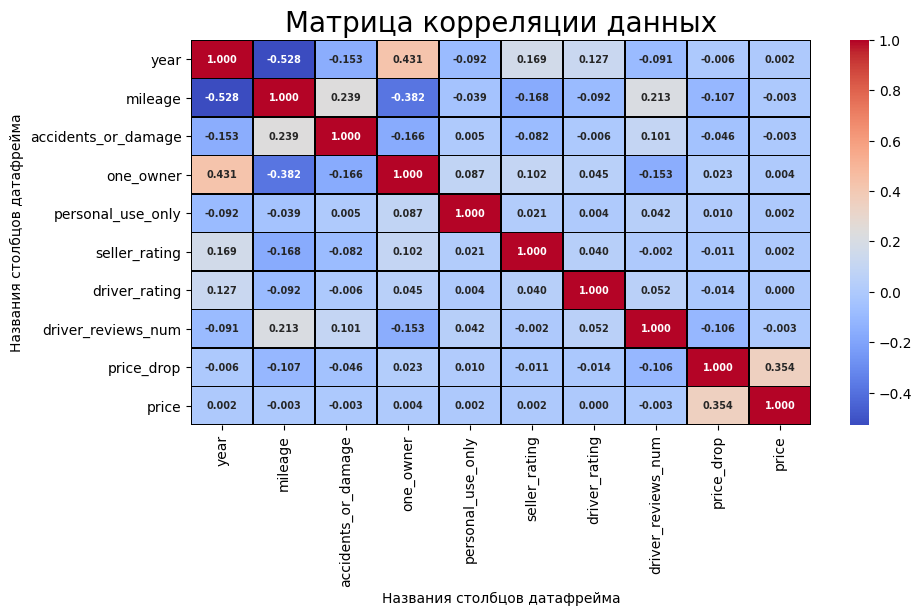

In [6]:
plt.figure(figsize=(10, 5))

# Построение тепловой карты корреляции
heatmap = sb.heatmap(
    df.corr().round(3), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.3f', 
    annot_kws={"size": 7, "weight": "bold"}, 
    linewidths=.5,
    linecolor='black');

# Применение настроек шрифта
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

heatmap.set_ylabel('Названия столбцов датафрейма', fontdict={'size': 10})
heatmap.set_xlabel('Названия столбцов датафрейма', fontdict={'size': 10})

# Добавление заголовка
plt.title('Матрица корреляции данных', fontdict={'size': 20});

plt.show()

Давайте условно назовем сильную корреляцию, когда значение превышает `0.5` / `-0.5`. 

Здесь в большинствах случаях корреляция равна нулю или слабо положительная / отрицательная.

Есть то, что стоит обратить внимание на очевидные вещи:
1. **Сильнотрицательная корреляция миля по отношению к году автомобилей**. Очевидно, что с увеличением милей (пробега) уменьшается значение года, т.к. новые автомобили еще не успели проехать несколько милей.
2. **Положительная корреляция одного лица автомобилей по отношению к году**. Естественно, чем старше автомобиль, тем в нем побывало несколько лиц. Не исключено, что несколько поколений лиц передано у этого автомобиля. 
3. **Положительная корреляция сниженной стоимости по отношению к изначальной стоимости автомобиля**. Здесь говорит о том, то чаще и всегда будет сниженная стоимость автомобиль дешеветь, когда изначальная стоимость будет снижать свою цену.
4. **Слабо положительная корреляция количества отзывов об автомобилях, оставленных водителями по отношению к пробегу милей автомобилей**. Автомобиль, у которого большой пробег, водитель ставят отзывы.

Рассмотрим выборосы и ящики с усами

## Выбросы

### Колонка "Год"

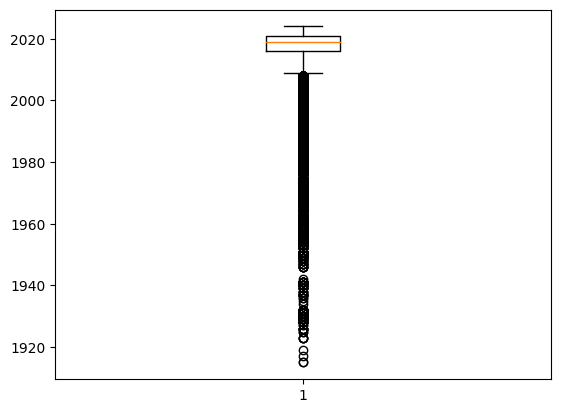

In [7]:
plt.boxplot(df['year']);

Здесь можно заметить, что у этой колонки огромные выбросы. Но есть другой случай, сложно называть их выбросами, т.к. в объявлениях редко выставляют автомобили, которые выпускались раньше 2000 года. Выбрососм можно считать, когда, например, автомобиль, выпущенная в 2000 год, в объявлениях указываются как 1950 года. Проверим вручную

In [8]:
df[df['year'] < 1920].head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
77047,Buick,Model H Base,1919,10240.0,6 Cyclinder,3 Speed Manual,NaN,NaN,0-0,Black,Black,0.0,NaN,1.0,Gateway Classic Cars,NaN,NaN,0.0,NaN,76000.0
269783,Ford,Model T Runabout,1917,0.0,177 CC I4,Manual,NaN,NaN,0-0,Black,Black,0.0,NaN,NaN,Gateway Classic Cars,NaN,NaN,0.0,NaN,22500.0
269785,Ford,Model T Touring,1915,0.0,I4,2 Speed Ruckstell Rear Axle Manual,NaN,NaN,0-0,Black,Black,0.0,NaN,1.0,Gateway Classic Cars,NaN,NaN,0.0,NaN,33000.0
269791,Ford,Model T,1915,0.0,177 CID Inline 4 cylinder,2 Speed Manual,NaN,NaN,0-0,White,Black,0.0,NaN,1.0,Gateway Classic Cars,NaN,NaN,0.0,NaN,26000.0


Интернет не соврал, есть такой [автомобиль](https://cdn.dealeraccelerate.com/ag/1/7754/719302/1920x1440/1919-buick-model-h45-touring)

Проверить все автомобили вручную, которые попадаются в рамках выброса, трудоемки и затратно. Если необходимо сделать отдельное исследование, например, рассмотреть в объявлених продажах автомобили с 2000 года, то необходимо устранить выбросы.

In [9]:
df[df['price'] == df['price'].max()]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
108142,Chevrolet,Cobalt LT,2009,85185.0,2.2L I4 16V MPFI DOHC,4-Speed Automatic,Front-wheel Drive,Gasoline,NaN,Black,Gray,0.0,1.0,1.0,"Rothrock Nissan, Chrysler, Dodge, Jeep, RAM",4.6,4.2,90.0,NaN,1.000000e+09
188113,Dodge,Durango Citadel,2018,113207.0,3.6L V6 24V MPFI DOHC,8-Speed Automatic,All-wheel Drive,Gasoline,18-25,DB Black Clearcoat,Black,0.0,1.0,1.0,"Rothrock Nissan, Chrysler, Dodge, Jeep, RAM",4.6,4.8,146.0,NaN,1.000000e+09
188260,Dodge,Durango Citadel,2018,113207.0,3.6L V6 24V MPFI DOHC,8-Speed Automatic,All-wheel Drive,Gasoline,18-25,DB Black Clearcoat,Black,0.0,1.0,1.0,"Rothrock Nissan, Chrysler, Dodge, Jeep, RAM",4.6,4.8,146.0,NaN,1.000000e+09


KeyError: 'RegistrationYear'

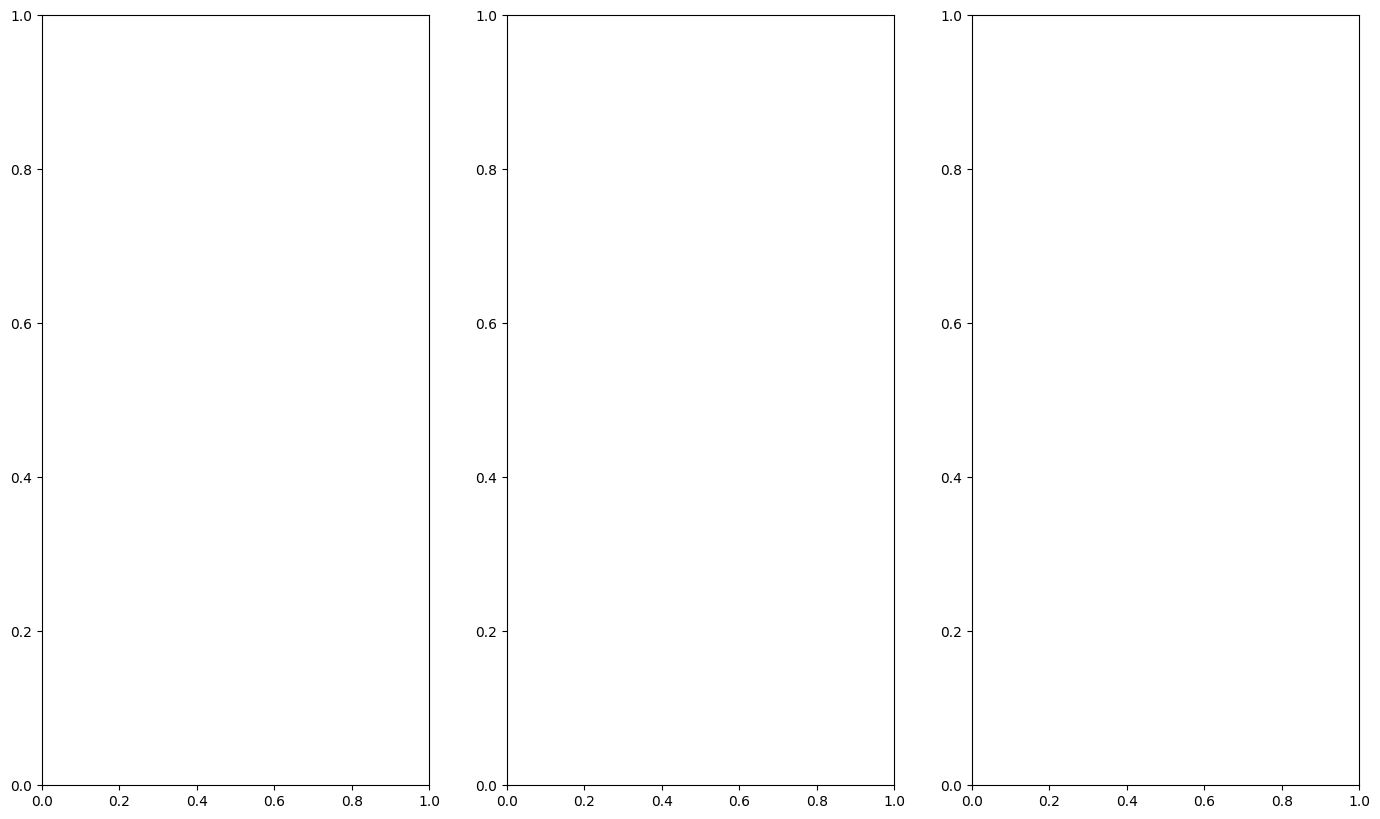

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(17, 10))

axs[0].boxplot(df['RegistrationYear'])
axs[0].set_title('RegistrationYear')
axs[0].set_ylabel('Год')
        
axs[1].boxplot(df['Power'])
axs[1].set_title('Power')
axs[1].set_ylabel('Мощность л.с')

axs[2].boxplot(df['Price'])
axs[2].set_title('Price')
axs[2].set_ylabel('Стоимость ЕВРО')